EN2550 - Fundementals of Image Processing and Machine Vision [Assignment 2 Fitting and Alignment]

Name : R.G.S.M. RANATUNGA

Index No. : 190504H

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Question 1

In [2]:
from scipy.optimize import minimize
from scipy import linalg

#np.random.seed(0)
N = 100
half_n = N//2
r = 10
s = r /16
t = np.random.uniform(0, 2*np.pi, half_n)
n = s*np.random.randn(half_n)
x , y = (r + n)*np.cos(t) , (r + n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1) ,y.reshape (half_n, 1)))
m, b = -1, 2
x = np . linspace (-12, 12, half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1) ,y.reshape(half_n, 1)))
X = np.vstack ((X_circ, X_line))

Question 2

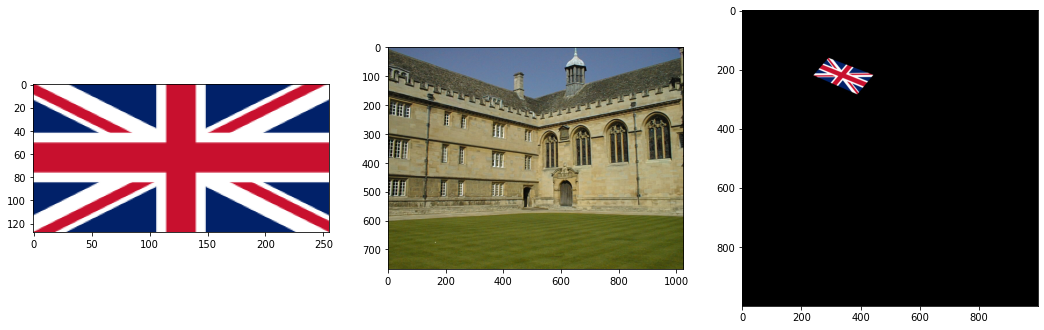

In [12]:
im1 = cv.imread(r'./flag.png', cv.IMREAD_ANYCOLOR)
im2 = cv.imread(r'./images/001.jpg', cv.IMREAD_ANYCOLOR)

#pts_src = np.array(
#pts_dst = np.array(

H, status = cv.findHomography(pts_src, pts_dst)
im1to2 = cv.warpPerspective(im1, H, (1000,1000))

fig,ax = plt.subplots(1,3, figsize = (18, 18))
ax[0].imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB))
#ax[0].axis('off')
ax[1].imshow(cv.cvtColor(im2, cv.COLOR_BGR2RGB))
#ax[1].axis('off')
ax[2].imshow(cv.cvtColor(im1to2, cv.COLOR_BGR2RGB))
#ax[2].axis('off')

Question 3

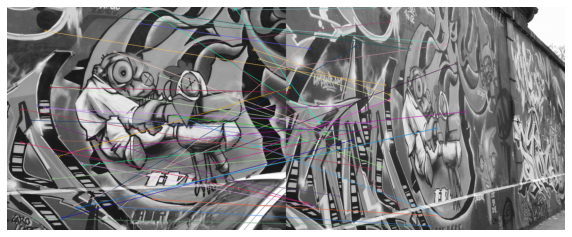

In [13]:
#reading image
img1 = cv.imread('graf/img1.ppm')  
img5 = cv.imread('graf/img5.ppm')

img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img5 = cv.cvtColor(img5, cv.COLOR_BGR2GRAY)

#keypoints
sift = cv.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img5,None)

bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
img3 = cv.drawMatches(img1, keypoints_1, img5, keypoints_2, matches[:50], img5, flags = 2)
plt.imshow(img3)
plt.show()